<a href="https://colab.research.google.com/github/darkfrozen158/03MIAR_04_A_2025-2026/blob/main/AG2/Algoritmos_AG2_CRISTIAN_LEONARDO_CHAVEZ_TRELLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Algoritmos - Actividad Guiada 2***

***Nombre: CRISTIAN LEONARDO CHAVEZ TRELLES***

***Github: https://github.com/darkfrozen158/03MIAR_04_A_2025-2026***

***Programación Dinámica. Viaje por el rio***

<img src="https://andeangreattreks.com/wp-content/uploads/The-Best-Peru-Amazon-River-Cruises-Amazon-River-Cruise-Destinations.jpg">

In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

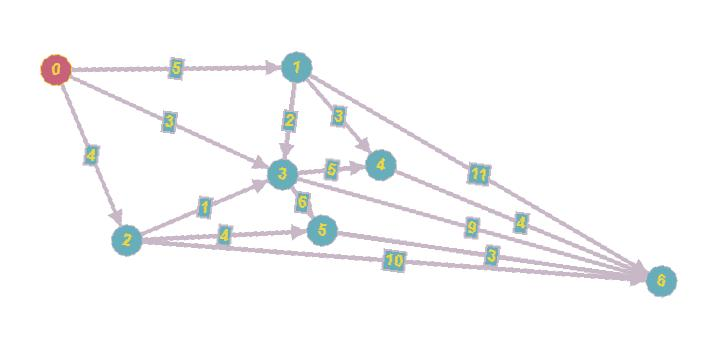

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

***EJERCICIO ELABORADO POR ALUMNO - TECNICA PROGRAMACION DINAMICA:***

In [6]:
#PROBLEMA: Se desea comparar dos documentos para encontrar el porcentaje de similitud (e.g., Turnitin).
#Usa la Distancia de Levenshtein (mínimo número de inserciones, eliminaciones o sustituciones para convertir un texto en otro) y
#luego lo convierte a un porcentaje.
def porcentaje_similitud(text1, text2):
    m, n = len(text1), len(text2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                dp[i][j] = max(i, j)
            elif text1[i-1] == text2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])
    max_len = max(m, n)
    return ((max_len - dp[m][n]) / max_len) * 100

In [7]:
#PRUEBA 1:
documento_a = "programación dinamica"
documento_b = "programación heuristica"
print("el porcentaje de similitud es: ", porcentaje_similitud(documento_a,documento_b))

el porcentaje de similitud es:  69.56521739130434


In [8]:
#PRUEBA 2:
documento_c = "programación avanzada2024"
documento_d = "programación avanzada2025"
print("el porcentaje de similitud es: ", porcentaje_similitud(documento_c,documento_d))

el porcentaje de similitud es:  96.0


***TECNICA DE RAMIFICACIÓN Y PODA :***

##Problema de Asignacion de tarea

<img src="https://static.vecteezy.com/system/resources/previews/023/374/805/non_2x/to-do-list-task-management-or-completion-tracking-or-reminder-to-finish-assignment-work-planning-or-schedule-concept-productive-businessman-with-pencil-and-to-do-list-clipboard-with-alarm-clock-vector.jpg">

In [9]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [10]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [11]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [12]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [13]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [14]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


##Descenso del gradiente

In [15]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [16]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

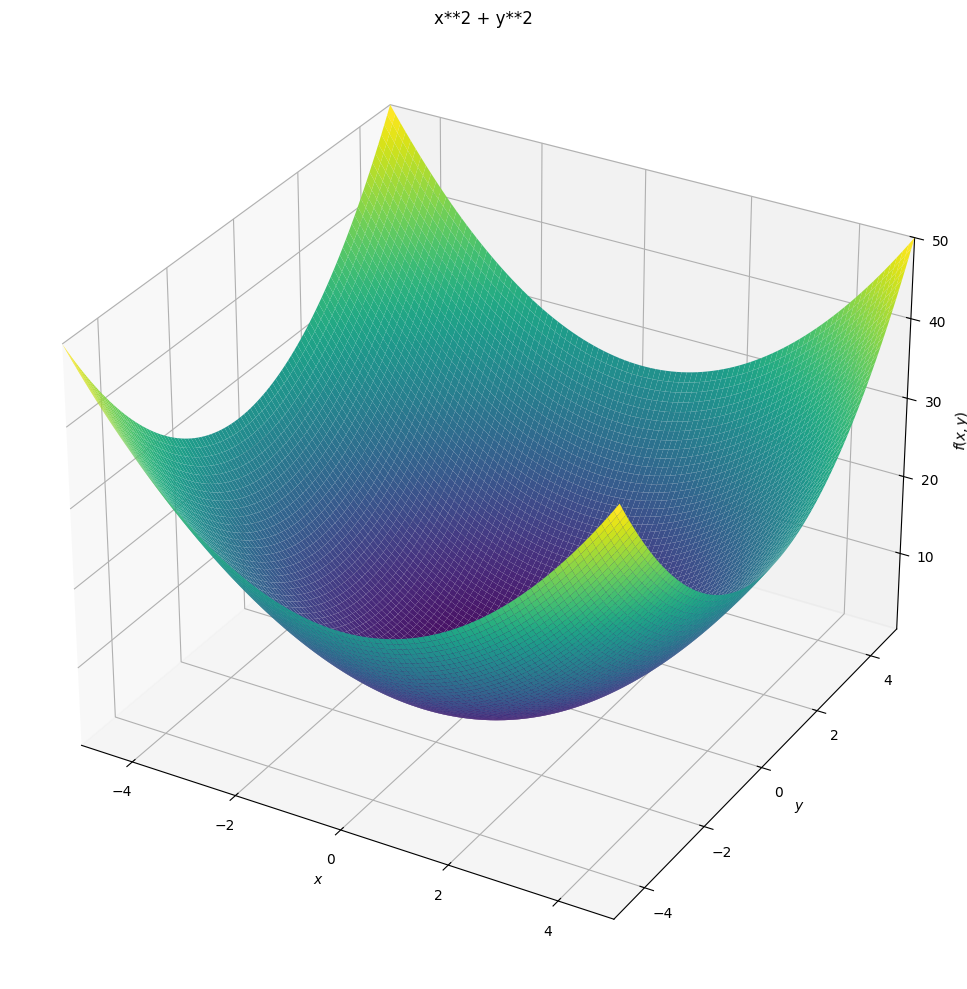

In [17]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

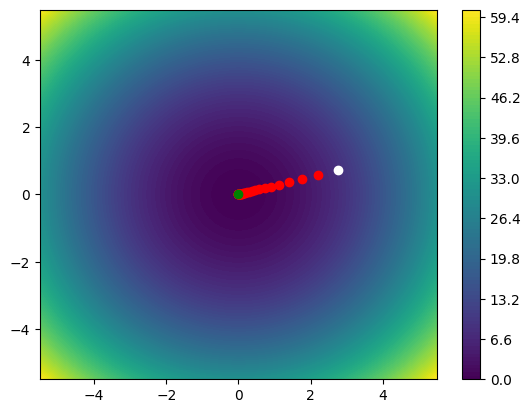

Solucion: [3.9261339202169285e-05, 1.0267209139235903e-05] 1.646868339456604e-09


In [18]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
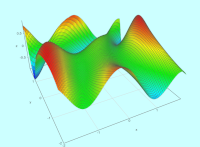


In [19]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


***EJERCICIO ELABORADO POR ALUMNO - TECNICA RAMIFICACIÓN Y PODA***

In [20]:
#Problema: Asignar tripulaciones a vuelos minimizando costos y cumpliendo regulaciones.
#Solución: Problema de asignación generalizada con Ramificación y Poda.
def asignar_tripulaciones(vuelos, tripulaciones, costos):
    # Validación de entradas
    if not vuelos or not tripulaciones or not costos:
        return [], 0

    if len(costos) != len(vuelos):
        raise ValueError("La matriz de costos no coincide con la cantidad de vuelos")

    mejor_asignacion = None
    mejor_costo = float('inf')

    # Preprocesamiento: Ordenar tripulaciones por costo ascendente para poda temprana
    # Creamos una lista de tripulaciones con sus índices originales
    tripulaciones_ordenadas = []
    for idx, trip in enumerate(tripulaciones):
        # Verificamos que el vuelo actual pueda ser asignado a esta tripulación
        for vuelo_idx, vuelo in enumerate(vuelos):
            if vuelo in trip['vuelos_posibles'] and costos[vuelo_idx][idx] != float('inf'):
                tripulaciones_ordenadas.append((idx, trip))
                break

    def backtrack(vuelo_actual, asignacion_actual, costo_actual):
        nonlocal mejor_asignacion, mejor_costo
        # Caso base: todos los vuelos asignados
        if vuelo_actual == len(vuelos):
            if costo_actual < mejor_costo:
                mejor_costo = costo_actual
                mejor_asignacion = asignacion_actual.copy()
            return

        # Explorar todas las tripulaciones posibles para este vuelo
        for trip_idx, trip in tripulaciones_ordenadas:
            # Verificar si la tripulación puede operar este vuelo y no ha sido asignada ya
            if (vuelos[vuelo_actual] in trip['vuelos_posibles'] and
                costos[vuelo_actual][trip_idx] != float('inf') and
                trip_idx not in asignacion_actual):

                nuevo_costo = costo_actual + costos[vuelo_actual][trip_idx]
                # Poda: solo continuar si el nuevo costo es mejor que el mejor conocido
                if nuevo_costo < mejor_costo:
                    backtrack(vuelo_actual + 1, asignacion_actual + [trip_idx], nuevo_costo)

    backtrack(0, [], 0)
    return mejor_asignacion, mejor_costo

In [21]:
# Ejemplo de uso
vuelos = ['NYC-LON', 'LON-DUB']
tripulaciones = [
    {'id': 0, 'vuelos_posibles': ['NYC-LON', 'LON-DUB']},  # Cambiado a id=0
    {'id': 1, 'vuelos_posibles': ['NYC-LON']},             # Cambiado a id=1
    {'id': 2, 'vuelos_posibles': ['LON-DUB']}              # Cambiado a id=2
]
costos = [
    [5, 3, float('inf')],  # Costos para NYC-LON
    [4, float('inf'), 2]    # Costos para LON-DUB
]

In [22]:
resultado = asignar_tripulaciones(vuelos, tripulaciones, costos)
print(f"Asignación óptima: {resultado[0]}, Costo total: {resultado[1]}")
# Output: Asignación óptima: [1, 2], Costo total: 5

Asignación óptima: [1, 2], Costo total: 5


***PRACTICA INDIVIDUAL:***

In [23]:
#LIBRERIAS NECESARIAS PARA DESARROLLAR LAS PRACTICAS.
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
import scipy as sc
import random
from sympy import symbols, diff, sin, cos, exp
import time
import itertools

***Ramificación y Poda. Practica***
***Análisis para mejorar nota:***
***- ¿Que complejidad tiene el algoritmo por fuerza bruta?***


In [24]:
# Función para generar matrices de costos aleatorias
def generar_matriz_costos(dimension, rango=(10, 50)):
    return np.random.randint(rango[0], rango[1], size=(dimension, dimension))

In [25]:
# Algoritmo de Fuerza Bruta
def fuerza_bruta(COSTES):
    start_time = time.time()  # Medir tiempo de ejecución

    N = len(COSTES)  # Número de tareas/agentes
    mejor_valor = float('inf')  # Inicializamos con infinito
    mejor_solucion = ()

    for s in itertools.permutations(range(N)):# Todas las asignaciones posibles
        valor_tmp = valor(s, COSTES)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s

    elapsed_time = time.time() - start_time  # Tiempo transcurrido

    print(f"\nFuerza Bruta: Mejor solución: {mejor_solucion} con costo: {mejor_valor}")
    print(f"Tiempo de ejecución: {elapsed_time:.4f} segundos")

    return mejor_valor, elapsed_time



In [26]:
resultados = []

for N in range(3, 12):
    # Desde 3x3 hasta 15x15
    print(f"\n=== Evaluando N={N} ===")
    COSTES = generar_matriz_costos(N)

    # Evaluar Fuerza Bruta
    fb_costo, fb_tiempo = fuerza_bruta(COSTES)

    # Evaluar Ramificación y Poda
    start_time = time.time()
    ramificacion_y_poda(COSTES)
    rp_tiempo = time.time() - start_time

    # Guardar resultados
    resultados.append((N, fb_tiempo, rp_tiempo))

    print(f"Tiempo Fuerza Bruta: {fb_tiempo:.4f} s")
    print(f"Tiempo Ramificación y Poda: {rp_tiempo:.4f} s")


=== Evaluando N=3 ===

Fuerza Bruta: Mejor solución: (1, 0, 2) con costo: 64
Tiempo de ejecución: 0.0001 segundos
La solucion final es: [{'s': (1, 0, 2), 'ci': np.int64(64)}]  en  4  iteraciones  para dimension:  3
Tiempo Fuerza Bruta: 0.0001 s
Tiempo Ramificación y Poda: 0.0001 s

=== Evaluando N=4 ===

Fuerza Bruta: Mejor solución: (3, 1, 2, 0) con costo: 80
Tiempo de ejecución: 0.0001 segundos
La solucion final es: [{'s': (3, 1, 2, 0), 'ci': np.int64(80)}]  en  20  iteraciones  para dimension:  4
Tiempo Fuerza Bruta: 0.0001 s
Tiempo Ramificación y Poda: 0.0003 s

=== Evaluando N=5 ===

Fuerza Bruta: Mejor solución: (0, 2, 3, 4, 1) con costo: 96
Tiempo de ejecución: 0.0002 segundos
La solucion final es: [{'s': (0, 4, 1, 2, 3), 'ci': np.int64(96)}]  en  60  iteraciones  para dimension:  5
Tiempo Fuerza Bruta: 0.0002 s
Tiempo Ramificación y Poda: 0.0010 s

=== Evaluando N=6 ===

Fuerza Bruta: Mejor solución: (1, 2, 0, 3, 4, 5) con costo: 103
Tiempo de ejecución: 0.0015 segundos
La sol

In [27]:
resultados2 = []
for N in range(3, 12):  # Desde 3x3 hasta 13x13
    print(f"\n=== Evaluando N={N} ===")
    COSTES = generar_matriz_costos(N)

    # Evaluar Ramificación y Poda
    start_time = time.time()
    ramificacion_y_poda(COSTES)
    rp_tiempo = time.time() - start_time

    # Guardar resultados
    resultados2.append((N, rp_tiempo))

    print(f"Tiempo Ramificación y Poda: {rp_tiempo:.4f} s")


=== Evaluando N=3 ===
La solucion final es: [{'s': (1, 2, 0), 'ci': np.int64(57)}]  en  5  iteraciones  para dimension:  3
Tiempo Ramificación y Poda: 0.0002 s

=== Evaluando N=4 ===
La solucion final es: [{'s': (1, 3, 2, 0), 'ci': np.int64(72)}]  en  20  iteraciones  para dimension:  4
Tiempo Ramificación y Poda: 0.0004 s

=== Evaluando N=5 ===
La solucion final es: [{'s': (2, 3, 4, 0, 1), 'ci': np.int64(81)}]  en  15  iteraciones  para dimension:  5
Tiempo Ramificación y Poda: 0.0006 s

=== Evaluando N=6 ===
La solucion final es: [{'s': (1, 3, 4, 0, 2, 5), 'ci': np.int64(123)}]  en  33  iteraciones  para dimension:  6
Tiempo Ramificación y Poda: 0.0010 s

=== Evaluando N=7 ===
La solucion final es: [{'s': (1, 4, 0, 5, 2, 3, 6), 'ci': np.int64(125)}]  en  235  iteraciones  para dimension:  7
Tiempo Ramificación y Poda: 0.0106 s

=== Evaluando N=8 ===
La solucion final es: [{'s': (5, 7, 6, 3, 1, 2, 4, 0), 'ci': np.int64(131)}]  en  1733  iteraciones  para dimension:  8
Tiempo Ramifica

****PREGUNTA: ¿Hay algún valor de la dimensión a partir del cual el algoritmo de ramificación y poda también deja de ser una opción válida?****

***RESPUESTA:***
El algoritmo de fuerza bruta evalúa todas las posibles asignaciones, por lo que su complejidad factorial  O(n!)  hace que el tiempo de ejecución crezca de manera exponencial. Según nuestras pruebas:

Para  n=3  a  n=6 , el tiempo de ejecución es manejable.
Para  n=7 , se observa un incremento notable en el tiempo de cómputo.
Para  n=8 , la ejecución ya se vuelve muy lenta.
Para  n≥9 , el tiempo de ejecución es demasiado alto y no se pudo completar en un tiempo razonable.
Por lo tanto, fuerza bruta deja de ser viable a partir de  n=8  en este experimento.

***PREGUNTA: ¿Hay algún valor de la dimensión a partir del cual el algoritmo de ramificación y poda también deja de ser una opción válida?****

***RESPUESTA:*** El algoritmo de ramificación y poda mejora la eficiencia mediante la eliminación de ramas no óptimas,
reduciendo el espacio de búsqueda en comparación con la fuerza bruta.
Sin embargo, su complejidad aún es exponencial en el peor caso.

***En esta prueba:***

Para  n=3  a  n=8 , el tiempo de ejecución se mantuvo aceptable.
Para  n=9  y  n=10 , el tiempo de ejecución aumentó, pero el algoritmo aún finalizó en un tiempo razonable.
Para  n>10 , el tiempo de ejecución comenzó a ser excesivo, y no se logró determinar en qué punto exacto deja de ser viable.

***Conclusión***
Fuerza bruta deja de ser viable a partir de  n=8 .
Ramificación y poda sigue siendo manejable hasta  n=10 , pero para valores mayores el tiempo de ejecución aumenta considerablemente.
No se pudo determinar un punto exacto donde ramificación y poda deja de ser viable, ya que depende de la estructura del problema y de la cantidad de podas realizadas.
Para valores de  >10 , se recomienda explorar técnicas heurísticas o metaheurísticas como búsqueda tabú, algoritmos genéticos o enfoques de optimización aproximada.

***Descenso del gradiente. Practica***
***Práctica para mejorar nota:***
***Minimizar la función por descenso del gradiente***

In [37]:
# Definir variables simbólicas
x, y = symbols('x y')

# Definir la nueva función
f_sym = sin((1/2) * x**2 - (1/4) * y**2 + 3) * cos(2*x + 1 - exp(y))

# Calcular gradiente (derivadas parciales)
df_dx = diff(f_sym, x)
df_dy = diff(f_sym, y)

# Convertir a funciones numéricas
f = lambda X: math.sin((1/2) * X[0]**2 - (1/4) * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

df = lambda X: [ float(df_dx.evalf(subs={x: X[0], y: X[1]})),
                 float(df_dy.evalf(subs={x: X[0], y: X[1]})) ]

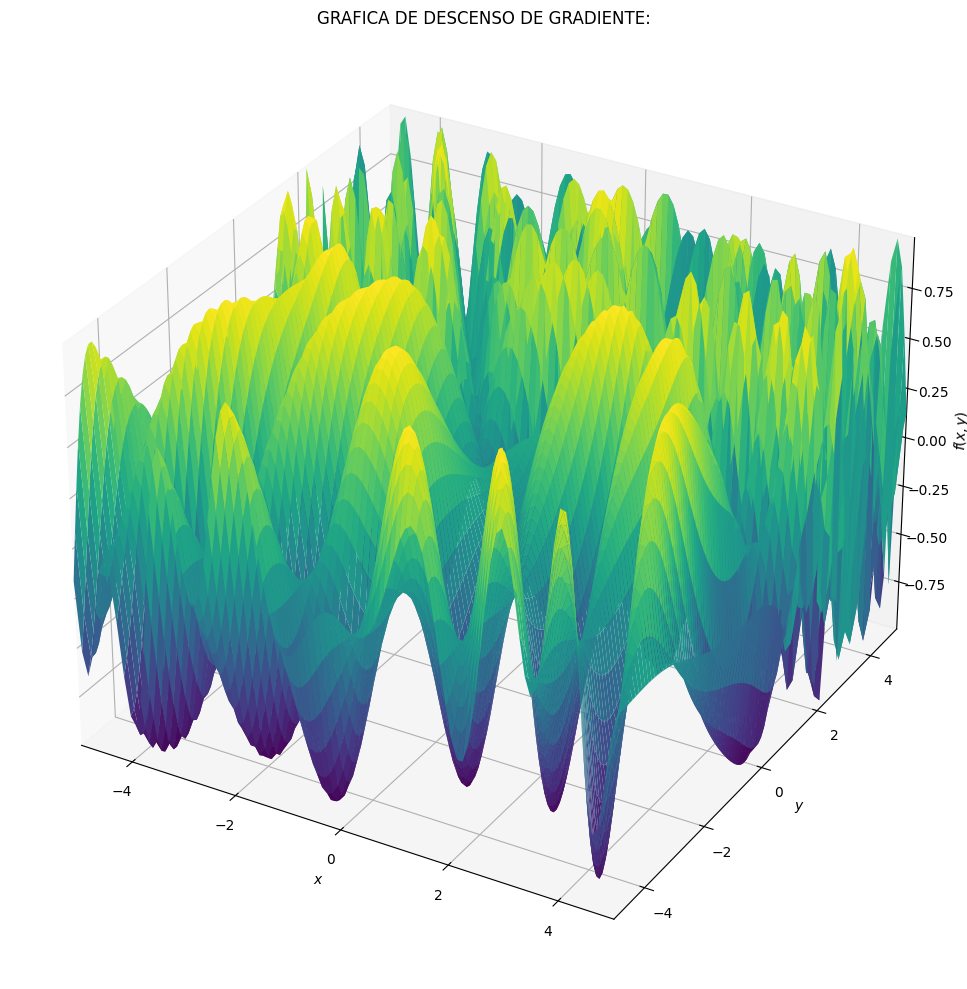

In [38]:
from sympy.plotting import plot3d

# Dibujar la función 3D
plot3d(f_sym,
       (x, -5, 5), (y, -5, 5),
       title='GRAFICA DE DESCENSO DE GRADIENTE:',
       size=(10,10))

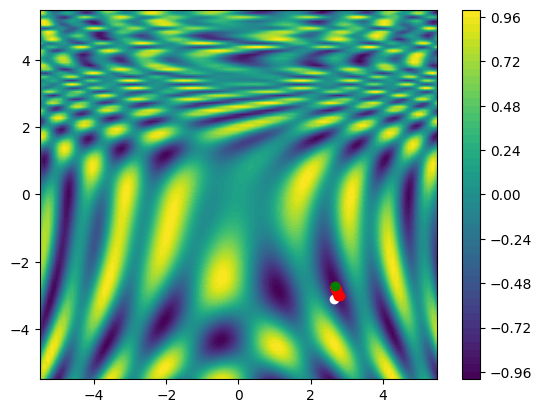

Solución encontrada: [2.6771280923808325, -2.7387316878070678] Valor de f(P): -0.9999712226258238


In [42]:
# Preparar datos para el mapa de niveles
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x_val in enumerate(X):
    for iy, y_val in enumerate(Y):
        Z[iy, ix] = f([x_val, y_val])

# Pintar el mapa de niveles de Z
plt.contourf(X, Y, Z, levels=50, cmap="viridis")
plt.colorbar()

# Generar un punto inicial aleatorio
P = [random.uniform(-10.5, 10.5), random.uniform(-10.5, 10.5)]
plt.plot(P[0], P[1], "o", color="white")  # Pintar punto inicial

# Tasa de aprendizaje fija
TA = 0.1

# Iteraciones del descenso del gradiente
for _ in range(50):
    grad = df(P)
    P[0] -= TA * grad[0]
    P[1] -= TA * grad[1]
    plt.plot(P[0], P[1], "o", color="red")  # Pintar el camino recorrido

# Pintar el punto final en verde
plt.plot(P[0], P[1], "o", color="green")
plt.show()

# Mostrar resultado final
print("Solución encontrada:", P, "Valor de f(P):", f(P))